In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from xgboost import XGBClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier


In [17]:
from imblearn.over_sampling import SMOTE

In [3]:
data = pd.read_csv("C:\Machine Learning\iranian+churn+dataset (1)\Customer Churn.csv")

In [4]:
data.head(5)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [5]:
data.info

<bound method DataFrame.info of       Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0                 8          0                    38               0   
1                 0          0                    39               0   
2                10          0                    37               0   
3                10          0                    38               0   
4                 3          0                    38               0   
...             ...        ...                   ...             ...   
3145             21          0                    19               2   
3146             17          0                    17               1   
3147             13          0                    18               4   
3148              7          0                    11               2   
3149              8          1                    11               2   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370                71     

In [6]:
data.describe

<bound method NDFrame.describe of       Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0                 8          0                    38               0   
1                 0          0                    39               0   
2                10          0                    37               0   
3                10          0                    38               0   
4                 3          0                    38               0   
...             ...        ...                   ...             ...   
3145             21          0                    19               2   
3146             17          0                    17               1   
3147             13          0                    18               4   
3148              7          0                    11               2   
3149              8          1                    11               2   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370                71   

In [7]:
data.shape

(3150, 14)

In [8]:
data.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [9]:
print(data['Churn'].value_counts(normalize=True))

Churn
0    0.842857
1    0.157143
Name: proportion, dtype: float64


In [10]:
print(data['Customer Value'].value_counts(normalize=True))

Customer Value
0.000      0.041905
45.495     0.003492
40.440     0.003175
15.165     0.001905
25.275     0.001587
             ...   
12.600     0.000317
59.925     0.000317
829.845    0.000317
815.535    0.000317
135.600    0.000317
Name: proportion, Length: 2654, dtype: float64


In [11]:
print(data['Age Group'].value_counts(normalize=True))

Age Group
3    0.452381
2    0.329206
4    0.125397
5    0.053968
1    0.039048
Name: proportion, dtype: float64


In [12]:
print(data['Tariff Plan'].value_counts(normalize=True))

Tariff Plan
1    0.922222
2    0.077778
Name: proportion, dtype: float64


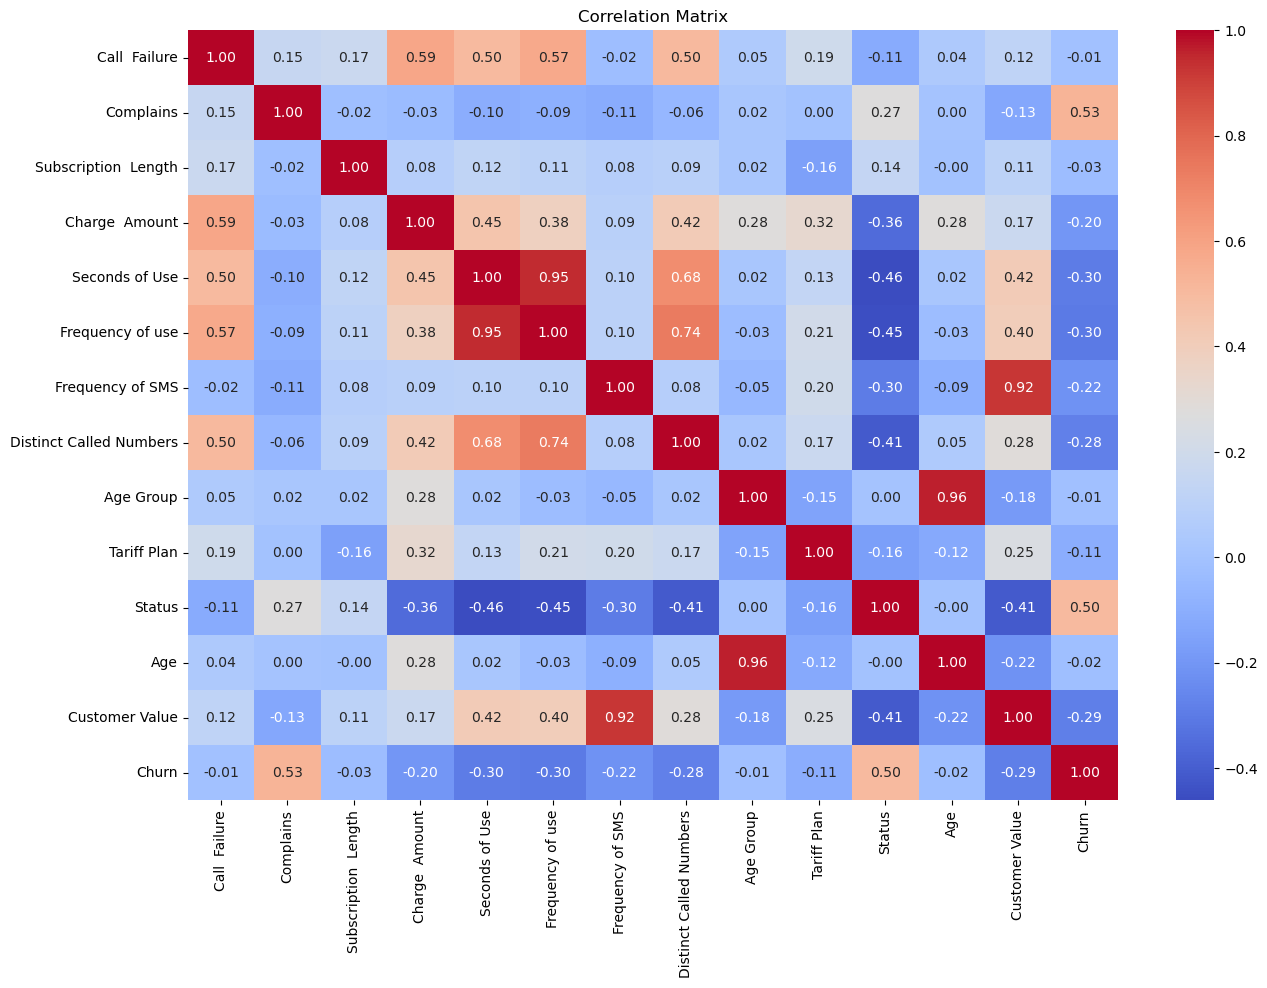

In [13]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

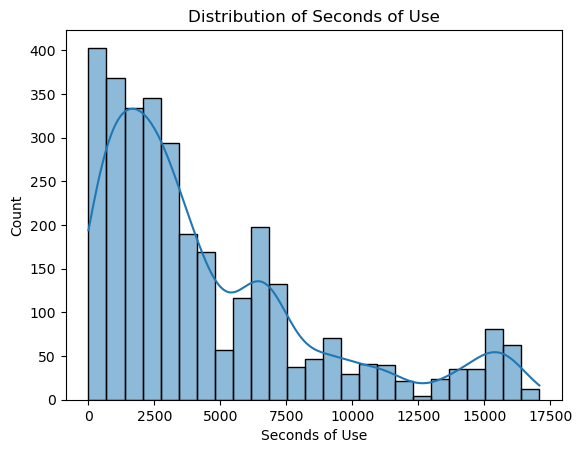

In [14]:
sns.histplot(data['Seconds of Use'], kde=True)
plt.title('Distribution of Seconds of Use')
plt.show()

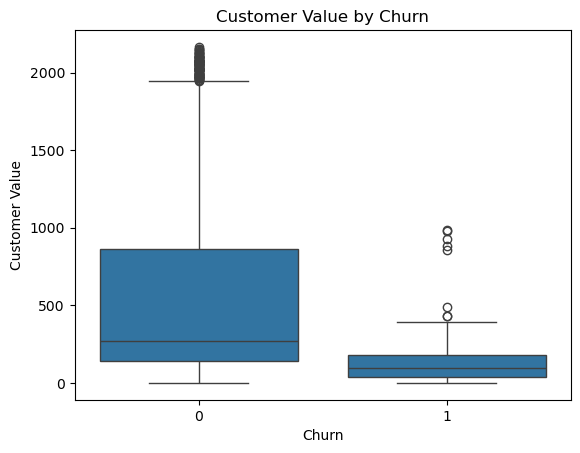

In [15]:
sns.boxplot(x='Churn', y='Customer Value', data=data)
plt.title('Customer Value by Churn')
plt.show()

In [19]:
X = data.drop("Churn", axis = 1)
y = data["Churn"]

In [20]:
X.head(5)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805


In [21]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [22]:
categorical_cols = ['Age Group', 'Tariff Plan', 'Status', 'Complains']

In [23]:
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [24]:
X.head(5)

,Call Failure,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age,Customer Value,Age Group_2,Age Group_3,Age Group_4,Age Group_5,Tariff Plan_2,Status_2,Complains_1
0,8,38,0,4370,71,5,17,30,197.640,False,True,False,False,False,False,False
1,0,39,0,318,5,7,4,25,46.035,True,False,False,False,False,True,False
2,10,37,0,2453,60,359,24,30,1536.520,False,True,False,False,False,False,False
3,10,38,0,4198,66,1,35,15,240.020,False,False,False,False,False,False,False
4,3,38,0,2393,58,2,33,15,145.805,False,False,False,False,False,False,False


In [25]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [36]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (4248, 16)
Testing set shape: (1062, 16)


In [37]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

In [38]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred)
    }

In [39]:
print(f"\n{name} Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


XGBoost Confusion Matrix:
[[519  13]
 [  7 523]]


In [40]:
results_df = pd.DataFrame(results).T
print("\nModel Performance:")
print(results_df)


Model Performance:
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.880414   0.863063  0.903774  0.882949  0.880458
Random Forest        0.976460   0.970205  0.983019  0.976570  0.976472
XGBoost              0.981168   0.975746  0.986792  0.981238  0.981178


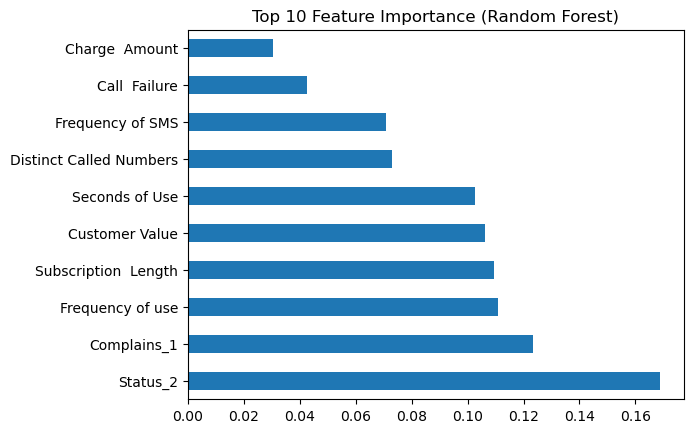

In [41]:
rf_model = models['Random Forest']
feature_names = X.columns  
feature_importance = pd.Series(rf_model.feature_importances_, index=feature_names)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importance (Random Forest)')
plt.show()

In [42]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

In [43]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [44]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", f1_score(y_test, y_pred_best))

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 Score: 0.9766136576239476


In [60]:
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

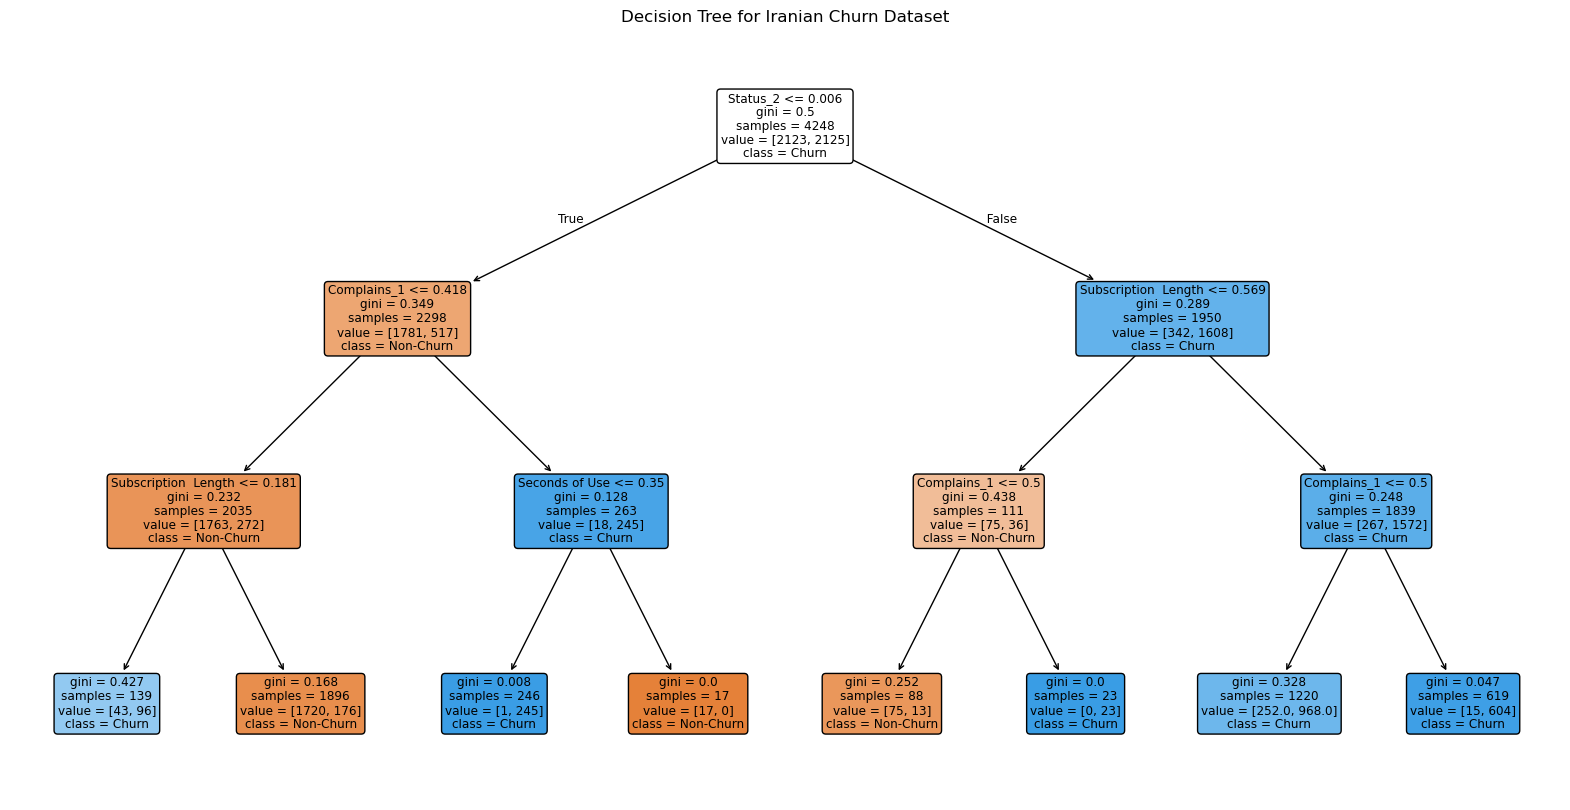

In [62]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Non-Churn', 'Churn'], filled=True, rounded=True)
plt.title('Decision Tree for Iranian Churn Dataset')
plt.show()

In [87]:
rf_model = RandomForestClassifier(max_depth=20,min_samples_split=2, n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Random Forest Performance:
Accuracy: 0.9764595103578154
F1 Score: 0.9766136576239476


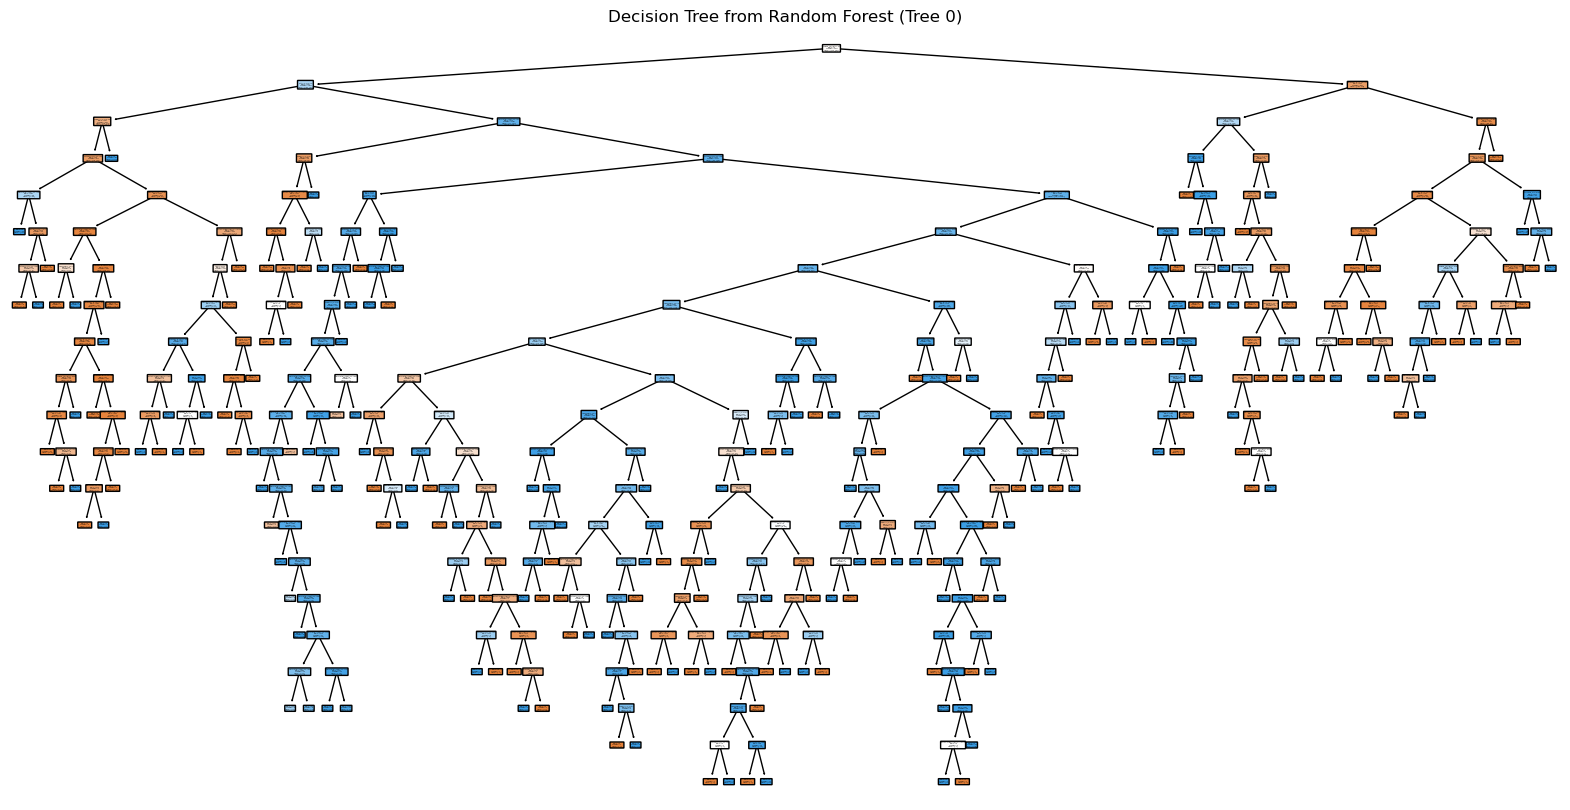

In [100]:
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=['Non-Churn', 'Churn'], 
          filled=True, rounded=True)
plt.title('Decision Tree from Random Forest (Tree 0)')
plt.savefig('C:/Machine Learning/Decision_Tree_Random_Forest.png', bbox_inches='tight')
plt.show()

In [75]:
data_chart = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.880414, 0.976460, 0.981168],
    'Precision': [0.863063, 0.970205, 0.975746],
    'Recall': [0.903774, 0.983019, 0.986792],
    'F1 Score': [0.882949, 0.976570, 0.981238],
    'ROC AUC': [0.880458, 0.976472, 0.981178]
}
df_results = pd.DataFrame(data_chart)

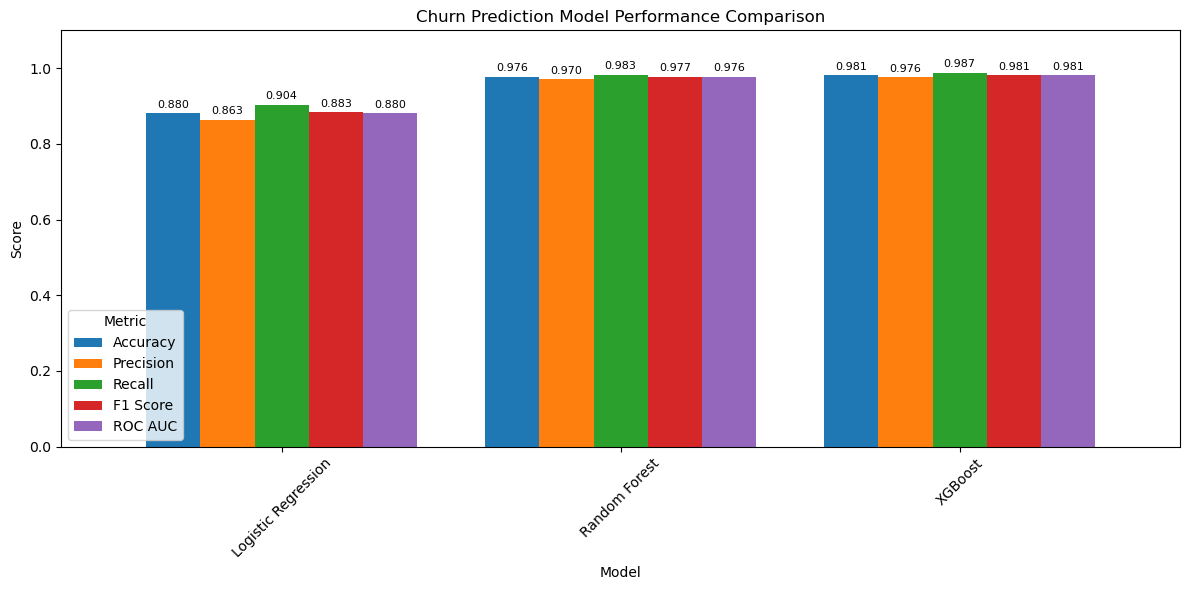

In [82]:
ax = df_results.set_index('Model').plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Churn Prediction Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1.1)  # Extend y-axis slightly for labels
plt.xticks(rotation=45)
plt.legend(title='Metric')
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Center of bar
            height + 0.01,  # Slightly above bar
            f'{height:.3f}',  # Format to 3 decimal places
            ha='center', va='bottom', fontsize=8
        )

plt.tight_layout()
plt.savefig('C:/Machine Learning/model_performance_with_values.png', bbox_inches='tight')
plt.show()

In [89]:
# Predict on test set
y_pred = rf_model.predict(X_test)
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Random Forest:")
print(cm)

Confusion Matrix for Random Forest:
[[515  17]
 [  8 522]]


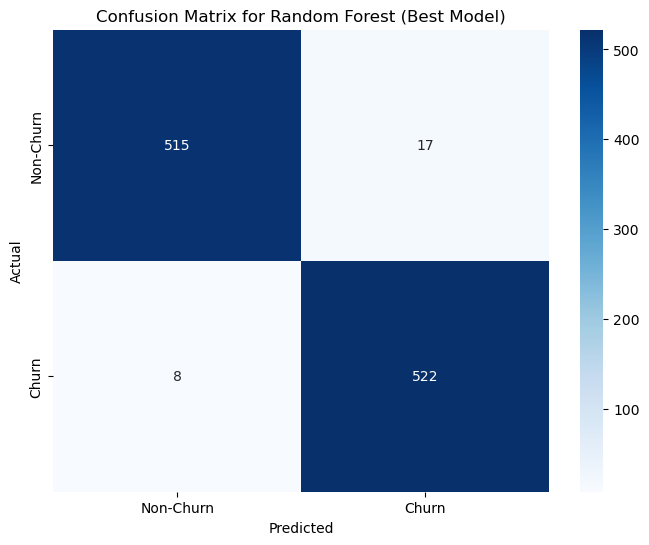

In [91]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix for Random Forest (Best Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('C:/Machine Learning/rf_confusion_matrix.png', bbox_inches='tight')
plt.show()

In [92]:
xgb_Model =XGBClassifier(random_state=42, eval_metric='logloss')

In [97]:
xgb_Model.fit(X_train, y_train)
y_pred_xgb = xgb_Model.predict(X_test)

Confusion Matrix for XGBoost:
[[519  13]
 [  7 523]]


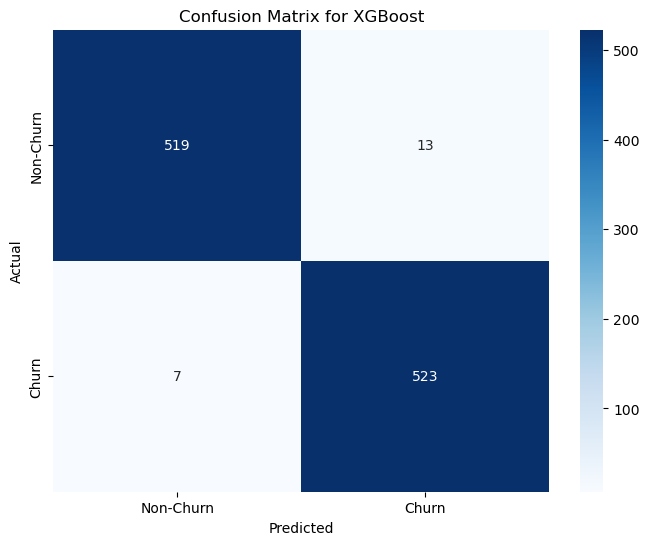

In [99]:
# Compute confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix for XGBoost:")
print(cm_xgb)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('C:/Machine Learning/xgb_confusion_matrix.png', bbox_inches='tight')
plt.show()